<a href="https://colab.research.google.com/github/vujjiniashrith/ESS-profit-maximization-using-deep-Reinforcement-Learning/blob/main/LSTM_consumerDemand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# !pip install scikit-learn

In [ ]:
# !pip install numpy==1.23.5
# !pip install pandas==1.3.4

In [ ]:
# !pip install --upgrade tensorflow==2.6.0
# !pip install --upgrade keras==2.6

In [ ]:
!pip list

Package                      Version             
---------------------------- --------------------
absl-py                      0.15.0              
aiohttp                      3.8.4               
aiosignal                    1.3.1               
anyio                        3.6.2               
apturl                       0.5.2               
argon2-cffi                  21.3.0              
argon2-cffi-bindings         21.2.0              
array-record                 0.4.0               
astor                        0.8.1               
asttokens                    2.2.1               
astunparse                   1.6.3               
async-timeout                4.0.2               
attrs                        22.2.0              
backcall                     0.2.0               
bcrypt                       3.1.7               
beautifulsoup4               4.12.2              
bleach                       6.0.0               
blinker                      1.4                 


In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:



from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
df = pd.read_csv("consumer_data_hourly.csv")


In [ ]:
df.head()

,dateTime,use
0,2016-01-01 00:00:00,2.108533
1,2016-01-01 01:00:00,1.852600
2,2016-01-01 02:00:00,1.988000
3,2016-01-01 03:00:00,1.993267
4,2016-01-01 04:00:00,1.781533


In [ ]:
df.tail()

,dateTime,use
8779,2016-12-31 19:00:00,12.455867
8780,2016-12-31 20:00:00,21.469133
8781,2016-12-31 21:00:00,10.920000
8782,2016-12-31 22:00:00,13.135600
8783,2016-12-31 23:00:00,9.111867


In [ ]:
df.shape

(8784, 2)

In [ ]:
columns = df.columns

In [ ]:
columns

Index(['dateTime', 'use'], dtype='object')

In [ ]:
df.shape

(8784, 2)

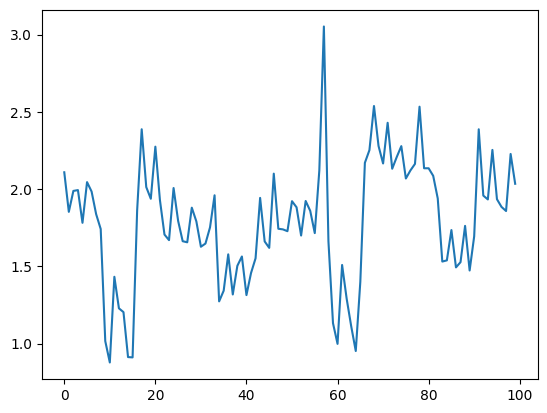

In [ ]:
plt.plot(df['use'][0:100])

In [ ]:
columns_to_name = ['datetime','price']

In [ ]:
df.columns = columns_to_name

In [ ]:
df[df.datetime.isnull()==True]#greatest dataset ever no null values

,datetime,price


In [ ]:
df = df.price
df

0        2.108533
1        1.852600
2        1.988000
3        1.993267
4        1.781533
          ...    
8779    12.455867
8780    21.469133
8781    10.920000
8782    13.135600
8783     9.111867
Name: price, Length: 8784, dtype: float64

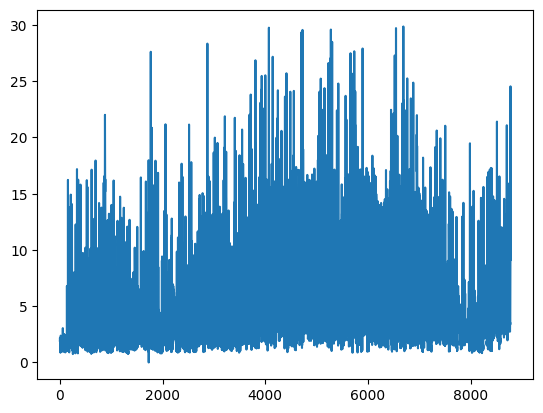

In [ ]:
plt.plot(df)

In [ ]:
##scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df1

array([[0.07059223],
       [0.06202376],
       [0.06655685],
       ...,
       [0.36559399],
       [0.43977073],
       [0.30505895]])

In [ ]:
total_size = len(df1)
training_size = int(total_size * 0.9)
valid_size = int(total_size * 0)
test_size = total_size - training_size - valid_size

train_data = df1[0:training_size,:]
valid_data = df1[training_size:training_size+valid_size,:]
test_data = df1[training_size+valid_size : ,:]

In [ ]:
train_data.shape

(7905, 1)

In [ ]:
valid_data.shape

(0, 1)

In [ ]:
test_data.shape

(879, 1)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=None):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----23   24
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 24
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(valid_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(7880, 24)
(7880,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
#X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(24, 1)))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')





In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 50)            7950      
                                                                 
 gru_5 (GRU)                 (None, 24, 100)           45600     
                                                                 
 gru_6 (GRU)                 (None, 24, 100)           60600     
                                                                 
 gru_7 (GRU)                 (None, 50)                22800     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 137,001
Trainable params: 137,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=50,verbose=1)

Epoch 1/100
158/158 [==============================] - 4s 10ms/step - loss: 0.0163
Epoch 2/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0127
Epoch 3/100
158/158 [==============================] - 1s 8ms/step - loss: 0.0121
Epoch 4/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0114
Epoch 5/100
158/158 [==============================] - 2s 11ms/step - loss: 0.0109
Epoch 6/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0110
Epoch 7/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0109
Epoch 8/100
158/158 [==============================] - 1s 9ms/step - loss: 0.0107
Epoch 9/100
158/158 [==============================] - 2s 11ms/step - loss: 0.0106
Epoch 10/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0105
Epoch 11/100
158/158 [==============================] - 2s 10ms/step - loss: 0.0105
Epoch 12/100
158/158 [==============================] - 1s 8ms/step - loss: 0.0106
Epoc

158/158 [==============================] - 1s 7ms/step - loss: 8.9930e-04
Epoch 100/100
158/158 [==============================] - 1s 6ms/step - loss: 8.1932e-04


In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
#val_predict=model.predict(X_val)
test_predict = model.predict(X_test)

In [ ]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
#val_predict=scaler.inverse_transform(val_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
train_predict.shape, y_train.shape


((7880, 1), (7880,))

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))

0.8091694811189314

In [ ]:
#math.sqrt(mean_squared_error(scaler.inverse_transform(y_val.reshape(-1,1)),val_predict))

In [ ]:
math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict))

2.6559081976050978

In [ ]:
test_predict.shape

(854, 1)

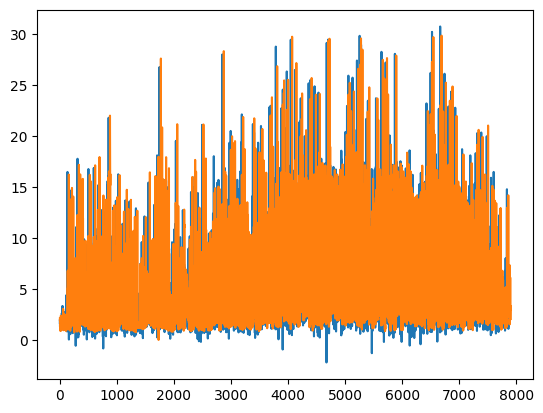

In [ ]:
plt.plot(train_predict)
plt.plot(scaler.inverse_transform(train_data))


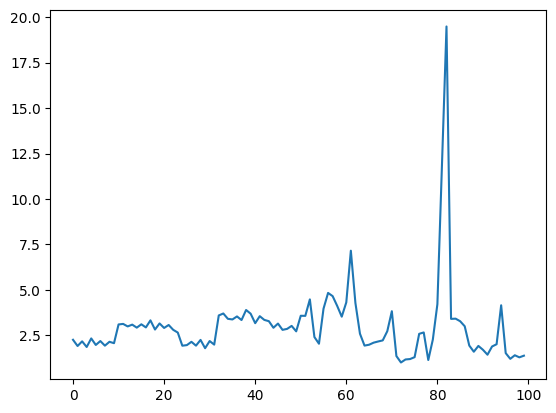

In [ ]:
plt.plot(scaler.inverse_transform(test_data[:100]))

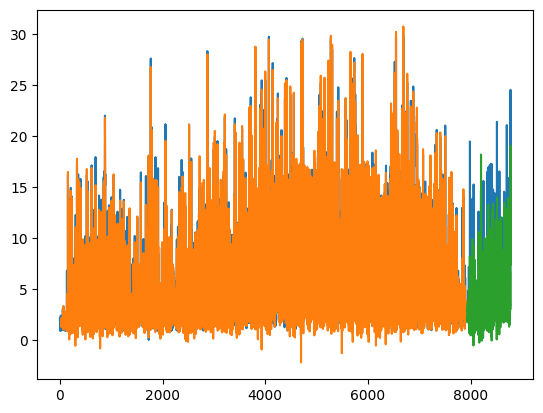

In [ ]:
### Plotting
# # shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift validation predictions for plotting
#validPredictPlot = np.empty_like(df1)
#validPredictPlot[:, :] = np.nan
#validPredictPlot[len(train_predict)+(look_back*2)+1:training_size+valid_size-1, :] = val_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+valid_size+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
#plt.plot(validPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

879

In [ ]:
x_input=test_data[879-24:].reshape(1,-1)
x_input.shape

(1, 24)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 24 hours

lst_output=[]
n_steps=24
i=0
while(i<24):

    if(len(temp_input)>24):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} hour input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} hour output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.36413446]
25
1 hour input [0.11634058 0.10107178 0.10887246 0.10146684 0.09371973 0.10545534
 0.09424647 0.09190515 0.11402604 0.11955013 0.11320468 0.11254179
 0.11347252 0.15846647 0.1618635  0.31317433 0.8217986  0.50907959
 0.41701374 0.71877162 0.36559399 0.43977073 0.30505895 0.36413446]
1 hour output [[0.22056973]]
2 hour input [0.10107178 0.10887246 0.10146684 0.09371973 0.10545534 0.09424647
 0.09190515 0.11402604 0.11955013 0.11320468 0.11254179 0.11347252
 0.15846647 0.1618635  0.31317433 0.8217986  0.50907959 0.41701374
 0.71877162 0.36559399 0.43977073 0.30505895 0.36413446 0.22056973]
2 hour output [[0.18392114]]
3 hour input [0.10887246 0.10146684 0.09371973 0.10545534 0.09424647 0.09190515
 0.11402604 0.11955013 0.11320468 0.11254179 0.11347252 0.15846647
 0.1618635  0.31317433 0.8217986  0.50907959 0.41701374 0.71877162
 0.36559399 0.43977073 0.30505895 0.36413446 0.22056973 0.18392114]
3 hour output [[0.18116404]]
4 hour input [0.10146684 0.09371973 0.10545534 0.09

In [ ]:
day_new=np.arange(1,25)
day_pred=np.arange(25,49)

In [ ]:
len(df1)

8784

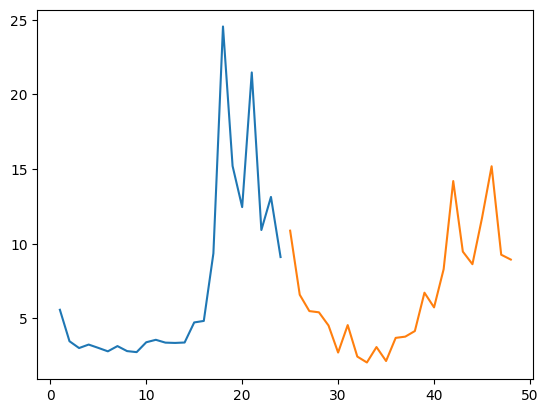

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[8784-24:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))